## Задание ##
По территориям региона приводятся данные о прожиточном минимуме и среднедушевой заработной плате.
Требуется:
1. Построить линейное уравнение парной регрессии y от x.
2. Построить график реальных данных и функции, полученной на основе уравнения регрессии.
3. Рассчитать линейный коэффициент парной корреляции и среднюю ошибку аппроксимации.
4. Оценить статистическую значимость параметров регрессии и корреляции с помощью F-критерия Фишера и t-критерия Стьюдента.

Исходные данные, согласно варианту №28:

In [11]:
# Импорт модулей представления данных в виде графиков и таблиц
import matplotlib.pyplot as plot
import pandas as pd

# Исходные данные
x = [78, 94, 85, 73, 91, 88, 73, 82, 99, 113, 69, 83]
y = [133, 139, 141, 127, 154, 142, 122, 135, 142, 168, 124, 130]

# Формирование таблицы
xCol = "Среднедушевой прожиточный минимум в день одного трудоспособного, X"
yCol = "Среднедневная заработная плата, у"
frame = pd.DataFrame(data = {xCol: x, yCol: y}, index = range(1,13))
frame.index.name = "№ региона"
frame

,"Среднедушевой прожиточный минимум в день одного трудоспособного, X","Среднедневная заработная плата, у"
№ региона,,
1,78,133
2,94,139
3,85,141
4,73,127
5,91,154
6,88,142
7,73,122
8,82,135
9,99,142


## 0. Код расчётов ##

In [12]:
# Среднее значение аргумента
def avg(arg):
    return sum(arg)/len(arg)

# Выборочное среднее (дисперсия) аргумента
def sigma(arg):
    avArg = avg(arg)
    dArg = [pow(i - avArg, 2) for i in arg]
    return pow(avg(dArg), 0.5)

n = len(x)
# Вспомогательные списки (массивы) — поэлементные произведения x и y, квадраты элементов x, квадраты элементов y
xy = [i * j for i,j in zip(x,y)]
x2 = [i*i for i in x]
y2 = [i*i for i in y]

# Коэффициенты уравнения регрессии
b = (avg(xy) - avg(x) * avg(y)) / (avg(x2) - pow(avg(x),2))
a = avg(y) - b * avg(x)

# Коэффициент корреляции
r_xy = b * sigma(x) / sigma(y)

# Коэффициент детерминации
r_xy2 = r_xy * r_xy

# F-критерий Фишера
F = r_xy2 / (1 - r_xy2) * (n - 2)

# Случайные ошибки параметров линейной регрессии и коэффициента корреляции
S2ost = sum([pow(j - a - b * i, 2) for i,j in zip(x,y)])/(n - 2)
Sost = pow(S2ost, 0.5)
mb = Sost / sigma(x) / pow(n, 0.5)
ma = Sost * pow(sum(x2), 0.5) / sigma(x) / n
mr = pow((1 - r_xy2) / (n - 2), 0.5)

tb = b / mb
ta = a / ma
tr = r_xy / mr
t = 2.228

# Доверительные интервалы коэффициентов
b_s, b_e = b - mb * t, b + mb * t
a_s, a_e = a - ma * t, a + ma * t

# Средняя ошибка аппроксимации
y_x = [a + b * i for i in x]
y_y_x = [j - i for i, j in zip(y_x, y)]
y_y_x2 = [i * i for i in y_y_x]
A = [abs((i - j)/i) * 100 for i, j in zip(y, y_x)]
A_av = avg(A)

## 1. Построение линейного уравнения парной регрессии ##
<br>
Математическое описание зависимости в среднем изменений результативного признака $y$ от фактора $x$ называется уравнением парной регрессии.
Уравнение парной линейной регрессии имеет вид

$$ \hat{y}_x = a + b \cdot x,$$

где $\hat{y}_x$ — среднее значение результативного признака при определенном значении факторного признака $х$, $а$ — свободный член уравнения регрессии, $b$ — коэффициент регрессии.

### Расчёт параметров уравнения ###
<br>
Оценки параметров модели можно найти по следующим формулам

$$ b = \frac{cov(a, b)}{\sigma^2} = \frac{\overline{x \cdot y} - \overline{x} \cdot \overline{y}}{\overline{x^2} - \overline{x}^2} $$

$$ a = \overline{y} - b \cdot \overline{x},$$
где $\overline{x}$ — среднее значение $x$, $\overline{y}$ — среднее значение $y$.

Для упрощения расчётов составим вспомогательную таблицу.

## Вспомогательная таблица ##

In [13]:
frame = pd.DataFrame(data = {"x": x, "y": y, "x * y": xy, "x^2": x2, "y^2": y2,
                             "y_x": y_x, "y_y_x": y_y_x, "y_y_x2": y_y_x2, "A": A}, index = range(1,13))
frame.index.name = "№ региона"
frame

,x,y,x * y,x^2,y^2,y_x,y_y_x,y_y_x2,A
№ региона,,,,,,,,,
1,78,133,10374,6084,17689,130.804492,2.195508,4.820255,1.650758
2,94,139,13066,8836,19321,145.995117,-6.995117,48.931664,5.032458
3,85,141,11985,7225,19881,137.450391,3.549609,12.599727,2.517453
4,73,127,9271,5329,16129,126.057422,0.942578,0.888454,0.742187
5,91,154,14014,8281,23716,143.146875,10.853125,117.790322,7.047484
6,88,142,12496,7744,20164,140.298633,1.701367,2.894650,1.198146
7,73,122,8906,5329,14884,126.057422,-4.057422,16.462672,3.325756
8,82,135,11070,6724,18225,134.602148,0.397852,0.158286,0.294705
9,99,142,14058,9801,20164,150.742187,-8.742187,76.425842,6.156470


In [14]:
print('a = ' + str(a) + ',')
print('b = ' + str(b) + '.')

a = 56.75019531250106,
b = 0.9494140624999877.


## Анализ результатов ##

Таким образом, искомое уравнение принимает вид

$$ \hat{y}_x = 56.75019531250106 + 0.9494140624999877 \cdot x $$

и говорит о том, что с увеличением прожиточного минимума на 1000 рублей средняя зарплата увеличивается на 949 рублей.

## 2. Построение графика реальных данных и функции, полученной на основе уравнения регрессии ##

Text(0, 0.5, 'Среднедневная заработная плата, у')

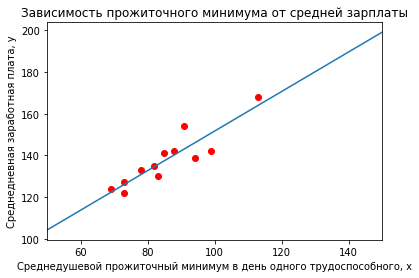

In [15]:
# Построение графика

fig, ax = plot.subplots()
ax.plot(frame ["x"][:12], frame ["y"][:12], "ro")
ax.plot([50, 150], [(a+b*x) for x in [50, 150]])
ax.set_title("Зависимость прожиточного минимума от средней зарплаты")
ax.set_xlim(50,150)
ax.set_xlabel("Среднедушевой прожиточный минимум в день одного трудоспособного, x")
ax.set_ylabel("Среднедневная заработная плата, у")

## 3. Рассчет линейного коэффициента парной корреляции и средней ошибки аппроксимации ##

Коэффициенты корреляции и детерминации вычисляется следующим образом

$$ r_{xy} = b \cdot \frac{\sigma_x}{\sigma_y}, $$
$$ r_{xy}^2 = r_{xy} \cdot r_{xy}, $$
$$ \sigma_x = \sqrt{\frac{\sum_{i=1}^n(x_i - \bar{x})^2}{n}}, $$
$$ \sigma_y = \sqrt{\frac{\sum_{i=1}^n(y_i - \bar{y})^2}{n}}, $$

где $r_{xy}$ - коэффициент корреляции между $y$ и $x$, $r_{xy}^2$ - коэффициент детерминации, $\overline{x}$ — среднее значение $x$, $\overline{y}$ — среднее значение $y$.

Помимо вычислений выше упомянутых коэффициентов, для анализа качества полученной модели необходимо вычислить среднюю ошибку аппроксимации

$$ A_i = \Biggl| \frac{y_i-\hat{y}_{x_i}}{y_i} \Biggr|, \;\; \overline{A}=\frac{\sum_{i=1}^n A_i}{n}. $$

In [16]:
print('r_xy = ' + str(r_xy))
print('r_xy2 = ' + str(r_xy2))
print('A_av = ' + str(A_av))



r_xy = 0.907266854062159
r_xy2 = 0.823133144479847
A_av = 2.999999038029035


## Анализ результатов ##

Коэффициент корреляции $r_{xy} = 0.907$ близок к $1$, что указывает на
тесную линейную связь между признаками.

Коэффициент детерминации $r_{xy}^2 = 0.823$ показывает, что уравнением регрессии объясняется $82,3\%$ дисперсии результативного признака, а на долю прочих факторов приходится $17,7\%$.

Значение средней ошибки аппроксимации $\overline{A} = 3\%$ говорит о хорошем подборе модели.

\newpage
## 4. Оценка статистической значимости параметров регрессии и корреляции с помощью F-критерия Фишера и t-критерия Стьюдента ##

Табличное значение F - критерия Фишера при $k_1 = m = 1, \; k_2 = n-m-1=10, \; \alpha = 0,05 \; F_{табл} = 4,96,$ а фактическое значение критерия найдём по формуле $$ F = \frac{r_{xy}^2}{1-r_{xy}^2}\cdot (n-2).$$


In [17]:
print('F = ' + str(F))

F = 46.53970593071665


Получаем, $F_{факт} = 46,54$ и $F_{табл} = 4,96$. Поскольку $F_{факт} > F_{табл}$, то признаётся статистическая значимость уравнения в целом.


Для оценки статистической значимости воспользуемся t-критерием Стьюдента. Табличное значение при $\nu=n-m-1=10,\: \alpha = 0,025$ $t_{табл}=2,228.$

Рассчитаем t-критерий Стьюдента и доверительные интервалы для коэффициентов регрессии и корреляции.
Сперва найдём необъяснённую дисперсию и случайные ошибки параметров линейной регрессии и коэффициента корреляции

$$ S_{ост}^2=\frac{\sum(y-\hat{y}_x)^2}{n-2}, $$
$$ m_a=S_{ост}\cdot\frac{\sqrt{\sum x^2}}{\sigma_x \cdot n}, \;\; m_b=\frac{S_{ост}}{\sigma_x\sqrt{n}}, \;\; m_r=\sqrt{\frac{1-r^2}{n-2}}.$$

И затем вычислим значения t-статистик по формулам

$$ t_a = \frac{a}{m_a}, \;\; t_b=\frac{b}{m_b}, \;\; t_r=\frac{r_{xy}}{m_a}.$$

In [18]:
print('S2ost = ' + str(S2ost))
print('mb = ' + str(mb))
print('ma = ' + str(ma))
print('mr = ' + str(mr))
print('ta = ' + str(ta))
print('tb = ' + str(tb))
print('tr = ' + str(tr))

S2ost = 33.05494140624999
mb = 0.13916942814506572
ma = 12.037149933095053
mr = 0.13299129878309823
ta = 4.714587392192527
tb = 6.822001607352652
tr = 6.822001607352247


Таким образом, получили $$ t_a = 4.715, \;\; t_b=6.822, \;\; t_r=6.822.$$
Расчётные значения критерия больше табличного. Следовательно, параметры регрессии и показательчастоты значимы.

Доверительные интервалы для параметров регрессии
$$a\in[a-t\cdot m_a,a+t\cdot m_a], \; b\in [b-t\cdot m_b,b+t\cdot m_b]$$


In [19]:
print('a:['+str(a_s)+','+str(a_e)+'],')
print('b:['+str(b_s)+','+str(b_e)+'].')

a:[29.93142526156528,83.56896536343685],
b:[0.6393445765927812,1.2594835484071942].
